<a href="https://colab.research.google.com/github/Manahil29/NIDS/blob/Decision-Tree/Network_Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: The task is to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.

MULTINOMIAL CLASSIFICATION (normal or DOS or PROBE or R2L or U2R)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import seaborn as sns
# import statsmodels.formula.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [ ]:
train = pd.read_csv("/Train.csv")
test = pd.read_csv("/Test.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
print("PROTOCOL TYPES", train["protocol_type"].unique(), "\n")
print("SERVICE TYPES", train["service"].unique(), "\n")
print("FLAG TYPES", train["flag"].unique(), "\n")

PROTOCOL TYPES ['tcp' 'udp' 'icmp'] 

SERVICE TYPES ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 

FLAG TYPES ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 



In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', ' num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [ ]:
#Adding classification label in training samples
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') |
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') |
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1 # 1 = DOS

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') |
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2  # 2 = PROBE

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') |
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') |
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') |
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3  # 3 = R2L

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') |
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4  # 4 = U2L

train["attack_class"] = train["attack_class"].astype(int)

In [ ]:
#Adding classification label in testing samples
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') |
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') |
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1 # 1 = DOS

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') |
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2  # 2 = PROBE

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') |
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') |
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') |
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3  # 3 = R2L

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') |
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4  # 4 = U2L

test["attack_class"] = test["attack_class"].astype(int)

In [ ]:
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (125973, 44)
Test shape: (22544, 44)


BASIC EXPLORATORY DATA ANALYSIS

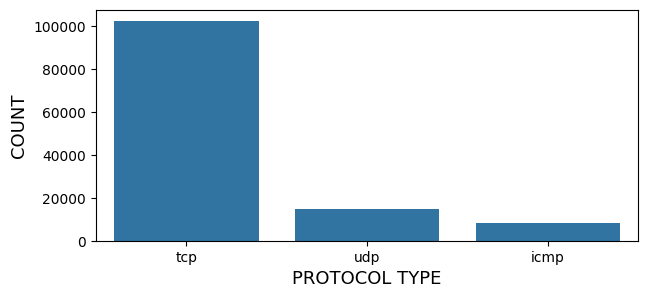

In [ ]:
# Protocol type distribution
plt.figure(figsize=(7,3))
sns.countplot(x="protocol_type", data=train)
plt.xlabel("PROTOCOL TYPE", fontsize=13)
plt.ylabel("COUNT", fontsize=13)
plt.show()

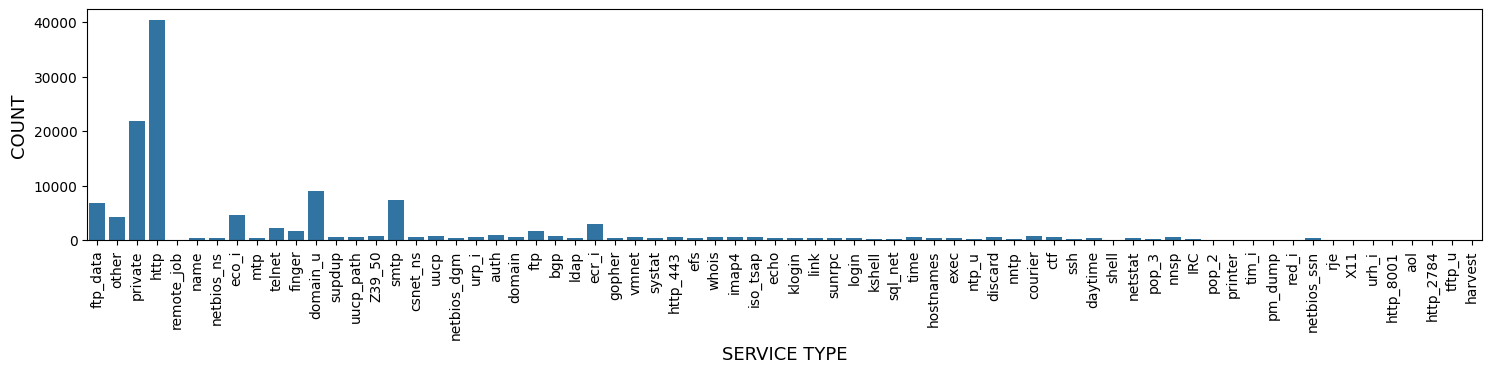

In [ ]:
# service distribution
plt.figure(figsize=(18,3))
sns.countplot(x="service", data=train)
plt.xlabel("SERVICE TYPE", fontsize=13)
plt.ylabel("COUNT", fontsize=13)
plt.xticks(rotation=90)
plt.show()

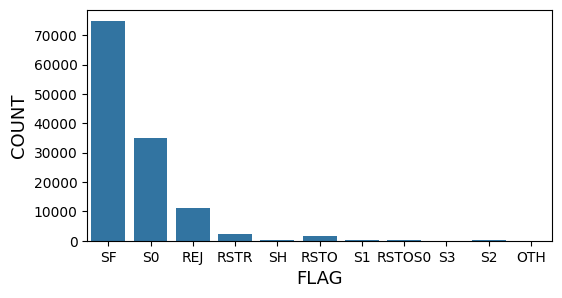

In [ ]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.xlabel("FLAG", fontsize=13)
plt.ylabel("COUNT", fontsize=13)
plt.show()

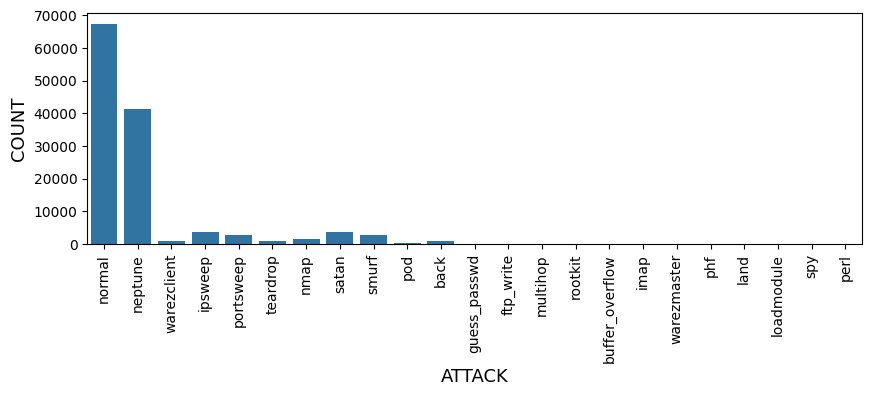

In [ ]:
# attack distribution
plt.figure(figsize=(10,3))
sns.countplot(x="attack", data=train)
plt.xlabel("ATTACK", fontsize=13)
plt.ylabel("COUNT", fontsize=13)
plt.xticks(rotation=90)
plt.show()

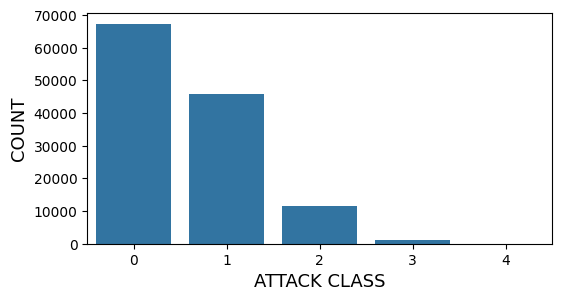

In [ ]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.xlabel("ATTACK CLASS", fontsize=13)
plt.ylabel("COUNT", fontsize=13)
plt.show()

In [ ]:
numeric_columns = train.select_dtypes(include=[float, int]).columns
train.groupby('attack_class')[numeric_columns].mean().T.drop("attack_class")

attack_class,0,1,2,3,4
duration,168.587396,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.279331,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.685223,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230655,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710646,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507076,0.019226,0.000601,0.077387,1.211538


<Axes: >

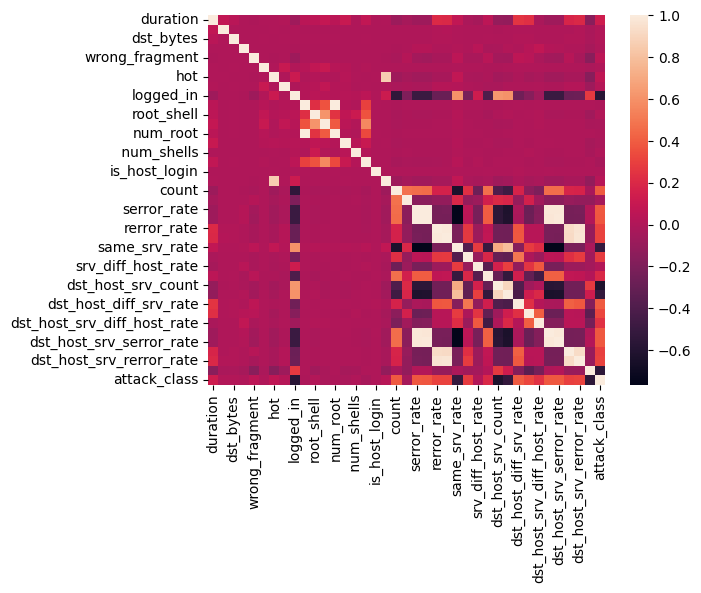

In [ ]:
train = train[[col for col in train if train[col].nunique() > 1]]
numeric_columns = train.select_dtypes(include=[float, int]).columns
correlation=train[numeric_columns].corr()
sns.heatmap(correlation)

<Axes: >

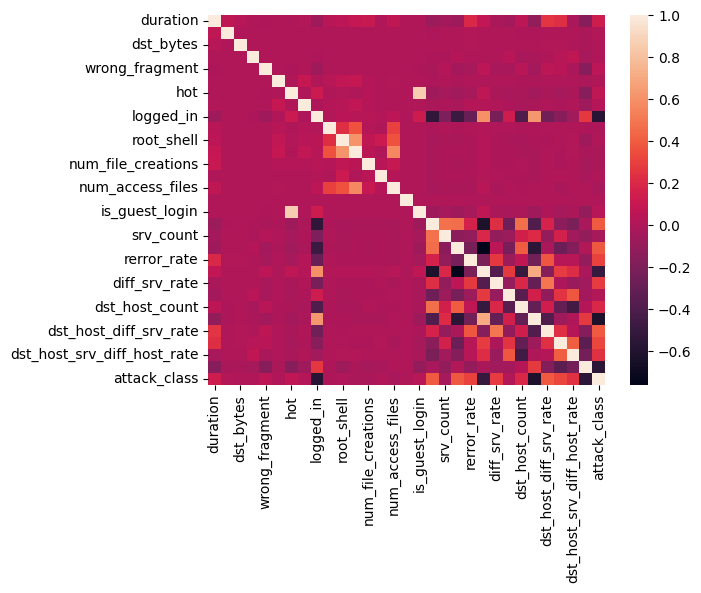

In [ ]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
train.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
train.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
train.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
train.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
train.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
train.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
train.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
train.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

train.drop('service', axis = 1, inplace = True)


numeric_columns = train.select_dtypes(include=[float, int]).columns
correlation=train[numeric_columns].corr()
sns.heatmap(correlation)

In [ ]:

# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
train['protocol_type'] = train['protocol_type'].map(pmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
train['flag'] = train['flag'].map(fmap)


# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
test['protocol_type'] = test['protocol_type'].map(pmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
test['flag'] = test['flag'].map(fmap)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int64  
 2   flag                         125973 non-null  int64  
 3   src_bytes                    125973 non-null  int64  
 4   dst_bytes                    125973 non-null  int64  
 5   land                         125973 non-null  int64  
 6   wrong_fragment               125973 non-null  int64  
 7   urgent                       125973 non-null  int64  
 8   hot                          125973 non-null  int64  
 9   num_failed_logins            125973 non-null  int64  
 10  logged_in                    125973 non-null  int64  
 11  num_compromised              125973 non-null  int64  
 12  root_shell                   125973 non-null  int64  
 13 

In [ ]:
X = train[train.columns.drop(['attack_class', 'attack'])]

X_new = SelectKBest(f_classif, k=15).fit(X, train['attack_class'])

In [ ]:
X_new.get_support()

array([False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['flag', 'hot', 'logged_in', 'count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'last_flag'],
      dtype='object')

In [ ]:
features=['flag', 'hot', 'logged_in', 'count', 'serror_rate', 'rerror_rate','same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate','dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate','last_flag']
X_train = train[features]
y_train = train['attack_class']
X_test = test[features]
y_test = test['attack_class']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Now apply the transformations to the data:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [ ]:
y_pred=mlp.predict(test_X)
y_pred

array([1, 1, 0, ..., 1, 0, 2])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[9391   52  267    1    0]
 [ 973 6401   83    3    0]
 [ 466  215 1740    0    0]
 [1892  271  534  152   36]
 [   6    1   19   20   21]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      9711
           1       0.92      0.86      0.89      7460
           2       0.66      0.72      0.69      2421
           3       0.86      0.05      0.10      2885
           4       0.37      0.31      0.34        67

    accuracy                           0.79     22544
   macro avg       0.71      0.58      0.57     22544
weighted avg       0.81      0.79      0.74     22544



In [ ]:
mlp.coefs_

[array([[-0.28480578, -0.2233364 ,  0.51848819, -0.51440489, -0.22449776,
          0.363422  , -0.13536095,  0.07476444,  0.01852506, -0.09544782,
         -0.34002842,  0.09538464,  0.23658014,  0.2150623 ,  0.18671142,
          0.51369858, -0.17509429,  0.29335096, -0.08446984, -0.07397826,
          0.06085934,  0.20194883, -0.17898755,  0.0945966 ,  0.31732766,
         -0.46177765, -0.39521768,  0.27460904,  0.15302981,  0.34596543],
        [ 0.26267543,  0.21742621, -0.04553221, -0.37496413, -0.02791862,
         -0.46556246, -0.05310182,  0.48277333,  0.14750115,  0.87234297,
          0.02835828,  0.07345377,  0.1945873 , -0.33944244, -0.84682912,
          0.20309179, -1.03658942,  0.37327007, -0.22149405, -0.50064872,
         -0.09313184, -0.35860987, -0.11955869,  0.19326185,  0.58775534,
         -0.2903435 , -0.83002012,  0.23637556,  0.31992084,  0.21564014],
        [-0.69121554, -0.22304562,  0.99169745,  0.71714866, -0.60646205,
         -0.12809932,  0.23125753,  

In [ ]:
accuracy_score( y_test, y_pred )

0.7853530872959545

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
# Removed 'export' as it's no longer available in recent scikit-learn versions.
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7853530872959545

In [ ]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [ ]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])})

In [ ]:
tree.best_score_

0.984742780543719

In [ ]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=8)

In [ ]:
tree.best_params_

{'max_depth': 8, 'max_features': 8}

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=8 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=8, max_features=8)

In [ ]:

clf_tree.feature_importances_

array([5.57000444e-02, 7.97550191e-03, 8.38639574e-03, 5.51259750e-02,
       6.23321061e-03, 2.85958625e-03, 3.91635830e-03, 6.03623892e-01,
       1.91357794e-04, 4.88237308e-03, 9.38721367e-03, 4.63854023e-02,
       1.02866923e-01, 3.19700959e-02, 6.04956705e-02])

In [ ]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('flag', 0.055700044352899214),
 ('hot', 0.007975501907706118),
 ('logged_in', 0.008386395735495378),
 ('count', 0.055125974991968626),
 ('serror_rate', 0.006233210608993828),
 ('rerror_rate', 0.002859586253457455),
 ('same_srv_rate', 0.003916358302466851),
 ('diff_srv_rate', 0.6036238917242369),
 ('srv_diff_host_rate', 0.000191357794479105),
 ('dst_host_count', 0.0048823730826986385),
 ('dst_host_srv_count', 0.009387213672557357),
 ('dst_host_diff_srv_rate', 0.046385402293638696),
 ('dst_host_same_src_port_rate', 0.10286692293020099),
 ('dst_host_srv_diff_host_rate', 0.03197009587800668),
 ('last_flag', 0.06049567047119408)]

In [ ]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
7,diff_srv_rate,0.603624
12,dst_host_same_src_port_rate,0.102867
14,last_flag,0.060496
0,flag,0.055700
3,count,0.055126
11,dst_host_diff_srv_rate,0.046385
13,dst_host_srv_diff_host_rate,0.031970
10,dst_host_srv_count,0.009387
2,logged_in,0.008386
1,hot,0.007976


In [ ]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [ ]:
tree_test_pred.sample( n = 10 )

,actual,predicted
4940,0,0
5393,3,1
13646,0,0
18278,0,1
9141,1,1
10639,0,0
15706,1,1
21079,3,3
7254,2,0
1991,3,0


In [ ]:
accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7569198012775018

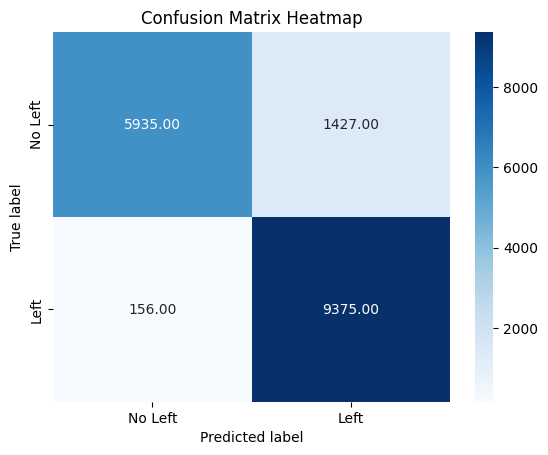

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming tree_test_pred is a DataFrame or similar object with 'predicted' and 'actual' columns
# Correct the confusion_matrix call
tree_cm = metrics.confusion_matrix(tree_test_pred.actual,
                                   tree_test_pred.predicted,
                                   labels=[1, 0])

# Create a heatmap
sns.heatmap(tree_cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=["No Left", "Left"], yticklabels=["No Left", "Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
plt.show()
